In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import sklearn
import os
%matplotlib inline

# Ignore warningsfrom __future__ import print_function
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Settings
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None)

sns.set(style='darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
header = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'num_outbound_cmds', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [1]:
os.chdir('/Content/drive')
os.listdir()

NameError: ignored

In [ ]:
data = pd.read_csv('./drive/My Drive/NSL_KDD-master/KDDTrain+_20Percent.txt', names=header)

In [ ]:
print('Data has {} rows & {} columns'.format(data.shape[0],data.shape[1]))
data.head()

Data has 25192 rows & 43 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Analysis

In [ ]:
# Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [ ]:
print(data['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [ ]:
# since num_outbound_cmds is a redundant colums, so remove it from dataset
data.drop(['num_outbound_cmds'], axis=1, inplace=True)
data.drop(['difficulty_level'], axis=1, inplace=True)

In [ ]:
# Attack class Distribution
data['attack_type'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
land                   1
ftp_write              1
spy                    1
loadmodule             1
Name: attack_type, dtype: int64

In [ ]:
for i in range(len(data['attack_type'])):
      if data['attack_type'][i] != 'normal':
        data['attack_type'][i] = 'anomaly'
    
data['attack_type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


normal     13449
anomaly    11743
Name: attack_type, dtype: int64

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)
print([X.shape, Y.shape])
Y

[(25192, 40), (25192, 1)]


array([['normal'],
       ['normal'],
       ['anomaly'],
       ...,
       ['anomaly'],
       ['anomaly'],
       ['anomaly']], dtype=object)

# Encoding Categorical Attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])

Y = encoder.fit_transform(Y).reshape(-1,1)
X.shape, Y.shape
Y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate']

In [ ]:
data_x = pd.DataFrame(X,columns=cols)
data_y = pd.DataFrame(Y)
data_y

,0
0,1
1,1
2,0
3,1
4,1
...,...
25187,0
25188,0
25189,0
25190,0


# Feature Selection

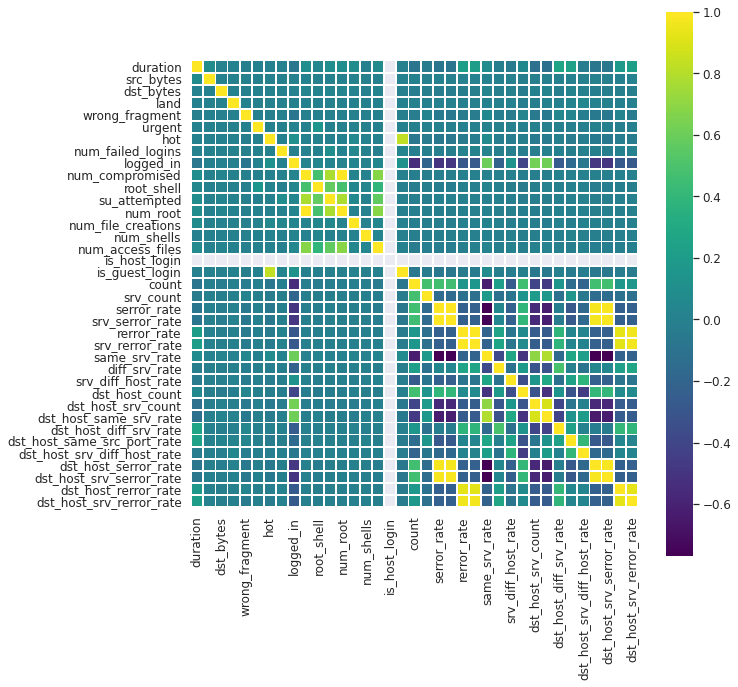

In [ ]:
corr_matrix = data.corr(method='pearson')
# print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='viridis',square=True,cbar=True,linewidths=0.9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


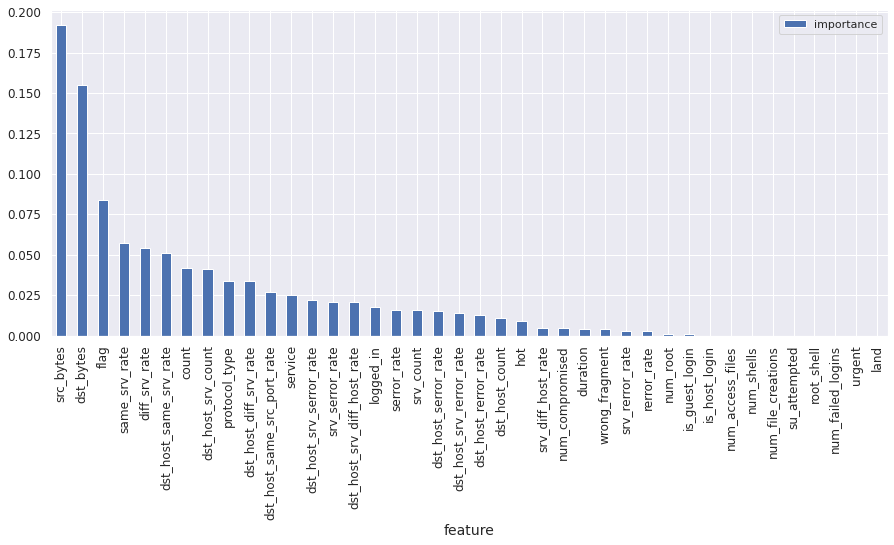

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_x,data_y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':data_x.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15,6)
importances.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe = rfe.fit(data_x, data_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), data_x.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [ ]:
X = data_x[selected_features]
X.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,1,19,9,491,0,0,2,2,1,0,25,0.17,0.03,0.17,0
1,2,41,9,146,0,0,13,1,0.08,0.15,1,0,0.6,0.88,0
2,1,46,5,0,0,0,123,6,0.05,0.07,26,0.1,0.05,0,0
3,1,22,9,232,8153,1,5,5,1,0,255,1,0,0.03,0.04
4,1,22,9,199,420,1,30,32,1,0,255,1,0,0,0


# Dataset Partition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 1), (7558, 1)]


In [ ]:
# for RNN
X_tr = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
X_te = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1], 1)
X_tr = np.array(X_tr).astype('float')
X_te = np.array(X_te).astype('float')
X_tr.shape, X_te.shape

((17634, 15, 1), (7558, 15, 1))

# Scaling Numerical Attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((17634, 15), (7558, 15))

# Fitting Models


In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
acc_score_evaluate = []
acc_score_validation = []

# ANN

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(60,activation='relu',input_dim=15))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(30,activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_ann.fit(X_train, Y_train,batch_size=32, epochs=25)

Epoch 1/25
552/552 [==============================] - 16s 2ms/step - loss: 0.3473 - accuracy: 0.8652
Epoch 2/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9461
Epoch 3/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9564
Epoch 4/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1292 - accuracy: 0.9610
Epoch 5/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1246 - accuracy: 0.9644
Epoch 6/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9704
Epoch 7/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9670
Epoch 8/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9692
Epoch 9/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9685
Epoch 10/25
552/552 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.971

In [ ]:
score_ann_eval = model_ann.evaluate(X_train,Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_eval[0],score_ann_eval[1]))

552/552 [==============================] - 1s 1ms/step - loss: 0.0522 - accuracy: 0.9801
Loss: 0.052 
Accuracy: 0.980 


In [ ]:
score_ann_val = model_ann.evaluate(X_test,Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_val[0],score_ann_val[1]))

237/237 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9784
Loss: 0.057 
Accuracy: 0.978 


In [ ]:
acc_score_evaluate.append(['ANN Classifier',score_ann_eval[1]])
acc_score_validation.append(['ANN Classifier',score_ann_val[1]])

In [ ]:
metrics.confusion_matrix(Y_test, model_ann.predict(X_test).round())

array([[3403,  113],
       [  50, 3992]])

# Keras Classifier with pipelining

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(60,activation='relu',input_dim=15))
    model.add(Dropout(0.5))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
score_kcp = results.mean()
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 97.79% (0.28%)


In [ ]:
acc_score_evaluate.append(['Keras Classifier', score_kcp])
acc_score_validation.append(['Keras Classifier', score_kcp])

# RNN


In [ ]:
model_rnn = Sequential()
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape = (15,1)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(256,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(512,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile('Adam','binary_crossentropy',['accuracy'])

In [ ]:
model_rnn.fit(X_tr, Y_train, batch_size=32,epochs=25)

Epoch 1/25
552/552 [==============================] - 33s 37ms/step - loss: 0.3764 - accuracy: 0.8344
Epoch 2/25
552/552 [==============================] - 20s 36ms/step - loss: 0.1698 - accuracy: 0.9438
Epoch 3/25
552/552 [==============================] - 20s 36ms/step - loss: 0.1556 - accuracy: 0.9490
Epoch 4/25
552/552 [==============================] - 20s 36ms/step - loss: 0.1426 - accuracy: 0.9515
Epoch 5/25
552/552 [==============================] - 20s 37ms/step - loss: 0.1278 - accuracy: 0.9603
Epoch 6/25
552/552 [==============================] - 21s 38ms/step - loss: 0.1238 - accuracy: 0.9604
Epoch 7/25
552/552 [==============================] - 21s 39ms/step - loss: 0.1211 - accuracy: 0.9619
Epoch 8/25
552/552 [==============================] - 21s 37ms/step - loss: 0.1131 - accuracy: 0.9636
Epoch 9/25
552/552 [==============================] - 20s 37ms/step - loss: 0.1079 - accuracy: 0.9666
Epoch 10/25
552/552 [==============================] - 23s 41ms/step - loss: 0.105

In [ ]:
keras.utils.plot_model(model_rnn, to_file='rnn.png', show_shapes=True)

AttributeError: ignored

In [ ]:
model_rnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)               

In [ ]:
score_rnn_eval = model_rnn.evaluate(X_tr, Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_eval[0],score_rnn_eval[1]))

552/552 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9887
Loss: 0.037 
Accuracy: 0.989 


In [ ]:
score_rnn_val = model_rnn.evaluate(X_te, Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_val[0],score_rnn_val[1]))

237/237 [==============================] - 1s 6ms/step - loss: 0.0353 - accuracy: 0.9885
Loss: 0.035 
Accuracy: 0.988 


In [ ]:
acc_score_evaluate.append(['RNN Classifier', score_rnn_eval[1]])
acc_score_validation.append(['RNN Classifier', score_rnn_val[1]])

In [ ]:
metrics.confusion_matrix(Y_test, model_rnn.predict(X_te).round())

array([[3459,   57],
       [  30, 4012]])

# Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 30, 30), solver='adam', shuffle=False, tol = 0.0001, early_stopping = True)
clf_mlp.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_score_eval = clf_mlp.score(X_train, Y_train)

print('MLP_final Score: %.3f ' % mlp_score_eval)

MLP_final Score: 0.988 


In [ ]:
mlp_score_val = clf_mlp.score(X_test, Y_test)
print('MLP_final Score: %.3f ' % mlp_score_val)

MLP_final Score: 0.985 


In [ ]:
acc_score_evaluate.append(['MLP Classifier', mlp_score_eval])
acc_score_validation.append(['MLP Classifier', mlp_score_val])

In [ ]:
metrics.confusion_matrix(Y_test, clf_mlp.predict(X_test).round())

array([[3447,   69],
       [  43, 3999]])

# Different Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train SVM Model
svc_Classifier = SVC()
svc_Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate Models

In [ ]:
from sklearn import metrics

In [ ]:
models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('KNeighbors Classifier', KNN_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv = 10)

    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    cm = metrics.confusion_matrix(Y_train, v.predict(X_train))
    ps = metrics.precision_score(Y_train, v.predict(X_train))
    rs = metrics.recall_score(Y_train, v.predict(X_train))
    fs = metrics.f1_score(Y_train, v.predict(X_train))
    cr = metrics.classification_report(Y_train, v.predict(X_train))
    acc_score_evaluate.append([i, accuracy])
    
    
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)
    print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.9423840135411321

Model Accuracy: 
 0.9426108653737099

Confusion Matrix: 
 [[7596  631]
 [ 381 9026]]

Precision Score: 
 0.9346587967277622

Recall Score: 
 0.9594982459870309

F-Score: 
 0.9469156525388166

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      8227
           1       0.93      0.96      0.95      9407

    accuracy                           0.94     17634
   macro avg       0.94      0.94      0.94     17634
weighted avg       0.94      0.94      0.94     17634




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8863001506142257

Model Accuracy: 
 0.8862424861063853

Confusion Matrix: 
 [[6874 1353]
 [ 653 8754]]

Precision Score: 
 0.8661323834965865

Recall Score: 
 0.9305836079515255

F-Score: 
 0.8972020088141848

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      8227
           1       0.87      0.93      0.90      9407

    accuracy                           0.89     17634
   macro avg       0.89      0.88      0.88     17634
weighted avg       0.89      0.89      0.89     17634



=============Decision Tree Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.9946693689765563

Model Accuracy: 
 1.0

Confusion Matrix: 
 [[8227    0]
 [   0 9407]]

Precision Score: 
 1.0

Recall Score: 
 1.0

F-Score: 
 1.0

Classification Report: 
               precision    recall  f1-score   support

           

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


=============Random Forest Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.9965406960666664

Model Accuracy: 
 1.0

Confusion Matrix: 
 [[8227    0]
 [   0 9407]]

Precision Score: 
 1.0

Recall Score: 
 1.0

F-Score: 
 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8227
           1       1.00      1.00      1.00      9407

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634




/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when


=============KNeighbors Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.9858794983298671

Model Accuracy: 
 0.9904729499829874

Confusion Matrix: 
 [[8148   79]
 [  89 9318]]

Precision Score: 
 0.9915930616154092

Recall Score: 
 0.9905389603486765

F-Score: 
 0.9910657306955967

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8227
           1       0.99      0.99      0.99      9407

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99      0.99      0.99     17634




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


=============Support Vector Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.9770331634260814

Model Accuracy: 
 0.9793580582964727

Confusion Matrix: 
 [[7979  248]
 [ 116 9291]]

Precision Score: 
 0.9740014676590838

Recall Score: 
 0.9876687573083873

F-Score: 
 0.9807875013195397

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      8227
           1       0.97      0.99      0.98      9407

    accuracy                           0.98     17634
   macro avg       0.98      0.98      0.98     17634
weighted avg       0.98      0.98      0.98     17634




In [ ]:
!pip install texttable

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_evaluate,header=False)
print(t.draw())

+---------------------------+----------+
| Model                     | Accuracy |
+---------------------------+----------+
| ANN Classifier            | 0.980    |
+---------------------------+----------+
| Keras Classifier          | 0.978    |
+---------------------------+----------+
| RNN Classifier            | 0.989    |
+---------------------------+----------+
| MLP Classifier            | 0.988    |
+---------------------------+----------+
| Logistic Regression       | 0.943    |
+---------------------------+----------+
| Naive Bayes Classifier    | 0.886    |
+---------------------------+----------+
| Decision Tree Classifier  | 1        |
+---------------------------+----------+
| Random Forest Classifier  | 1        |
+---------------------------+----------+
| KNeighbors Classifier     | 0.990    |
+---------------------------+----------+
| Support Vector Classifier | 0.979    |
+---------------------------+----------+


In [ ]:
!pip install tabulate
from tabulate import tabulate
print(tabulate(acc_score_evaluate,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                       Accuracy
-------------------------  ----------
ANN Classifier               0.980
Keras Classifier             0.978
RNN Classifier               0.989
MLP Classifier               0.988
Logistic Regression          0.943
Naive Bayes Classifier       0.886
Decision Tree Classifier     1.000
Random Forest Classifier     1.000
KNeighbors Classifier        0.990
Support Vector Classifier    0.979


# Validating Models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv = 10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    cm = metrics.confusion_matrix(Y_test, v.predict(X_test))
    ps = metrics.precision_score(Y_test, v.predict(X_test))
    rs = metrics.recall_score(Y_test, v.predict(X_test))
    fs = metrics.f1_score(Y_test, v.predict(X_test))
    cr = metrics.classification_report(Y_test, v.predict(X_test))
    acc_score_validation.append([i,accuracy])
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.94403272714531

Model Accuracy: 
 0.9454882243979889

Confusion Matrix: 
 [[3271  245]
 [ 167 3875]]

Precision Score: 
 0.9405339805825242

Recall Score: 
 0.958683819891143

F-Score: 
 0.9495221759372703

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3516
           1       0.94      0.96      0.95      4042

    accuracy                           0.95      7558
   macro avg       0.95      0.94      0.95      7558
weighted avg       0.95      0.95      0.95      7558


=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8954723361014754

Model Accuracy: 
 0.8949457528446679

Confusion Matrix: 
 [[2988  528]
 [ 266 3776]]

Precision Score: 
 0.8773234200743495

Recall Score: 
 0.9341909945571499

F-Score: 
 0.9048646057991853

Classification Report: 
               p

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_validation,header=False)
print(t.draw())

+---------------------------+----------+
| Model                     | Accuracy |
+---------------------------+----------+
| ANN Classifier            | 0.978    |
+---------------------------+----------+
| Keras Classifier          | 0.978    |
+---------------------------+----------+
| RNN Classifier            | 0.988    |
+---------------------------+----------+
| MLP Classifier            | 0.985    |
+---------------------------+----------+
| Logistic Regression       | 0.945    |
+---------------------------+----------+
| Naive Bayes Classifier    | 0.895    |
+---------------------------+----------+
| Decision Tree Classifier  | 0.994    |
+---------------------------+----------+
| Random Forest Classifier  | 0.998    |
+---------------------------+----------+
| KNeighbors Classifier     | 0.986    |
+---------------------------+----------+
| Support Vector Classifier | 0.978    |
+---------------------------+----------+


In [ ]:
print(tabulate(acc_score_validation,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                       Accuracy
-------------------------  ----------
ANN Classifier               0.978
Keras Classifier             0.978
RNN Classifier               0.988
MLP Classifier               0.985
Logistic Regression          0.945
Naive Bayes Classifier       0.895
Decision Tree Classifier     0.994
Random Forest Classifier     0.998
KNeighbors Classifier        0.986
Support Vector Classifier    0.978


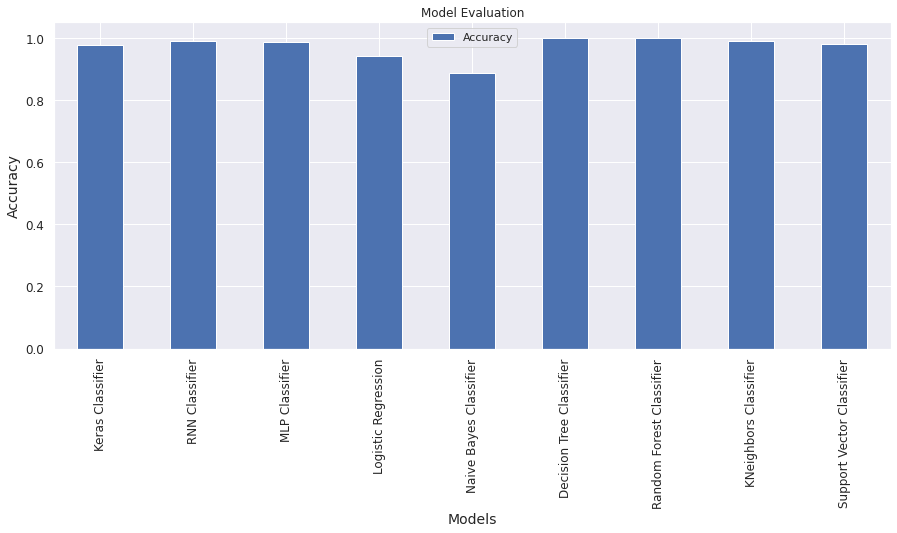

In [ ]:
df = pd.DataFrame(acc_score_evaluate[1:],columns=['Model','Accuracy'])
df_eval = df.set_index('Model')
ax = df_eval.plot(kind='bar', title='Model Evaluation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

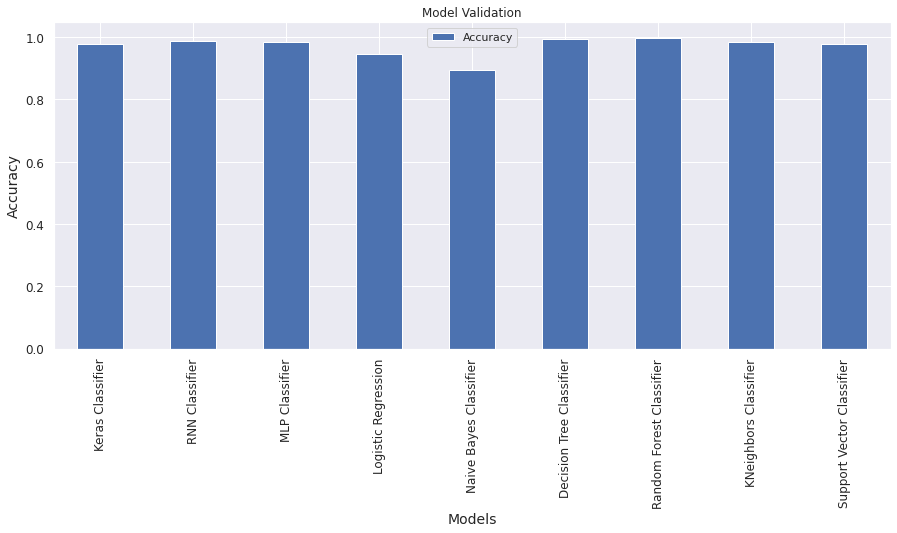

In [ ]:
df_val = pd.DataFrame(acc_score_validation[1:],columns=['Model','Accuracy'],index=df['Model'])
ax = df_val.plot(kind='bar', title='Model Validation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()